In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
def mean_absolute_percentage_error(y,y_pred):
    y = np.array(y)
    y_pred = np.array(y_pred)
    return 100*np.mean(np.abs((y-y_pred)/y))

In [3]:
df = pd.read_excel('sce.xlsx')
df[:5]

,Date,Load,temp
0,2014-01-01 00:00:00,9891.0,59.4685
1,2014-01-01 01:00:00,9553.0,61.4030
2,2014-01-01 02:00:00,9222.0,55.0310
3,2014-01-01 03:00:00,9024.0,53.1878
4,2014-01-01 04:00:00,8987.0,51.9944


In [4]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['hour'] = df['Date'].dt.hour
df['dayofweek'] = df['Date'].dt.dayofweek
df[:5]

,Date,Load,temp,year,month,day,hour,dayofweek
0,2014-01-01 00:00:00,9891.0,59.4685,2014,1,1,0,2
1,2014-01-01 01:00:00,9553.0,61.4030,2014,1,1,1,2
2,2014-01-01 02:00:00,9222.0,55.0310,2014,1,1,2,2
3,2014-01-01 03:00:00,9024.0,53.1878,2014,1,1,3,2
4,2014-01-01 04:00:00,8987.0,51.9944,2014,1,1,4,2


In [5]:
model1 = smf.ols(formula = 'Load~C(month) + C(day) + C(hour) + C(dayofweek) + year',data = df).fit()
model1.rsquared

0.7308342402829953

In [6]:
df['pred1'] = model1.predict(df)
df[:5]

,Date,Load,temp,year,month,day,hour,dayofweek,pred1
0,2014-01-01 00:00:00,9891.0,59.4685,2014,1,1,0,2,9918.880255
1,2014-01-01 01:00:00,9553.0,61.4030,2014,1,1,1,2,9436.421064
2,2014-01-01 02:00:00,9222.0,55.0310,2014,1,1,2,2,9118.871381
3,2014-01-01 03:00:00,9024.0,53.1878,2014,1,1,3,2,8960.476921
4,2014-01-01 04:00:00,8987.0,51.9944,2014,1,1,4,2,9053.230022


In [7]:
y = df['Load']
y_pred = df['pred1']
X = df.drop(columns = 'Load',axis = 1)

In [8]:
mean_absolute_percentage_error(y,y_pred)

8.069690608017101

<AxesSubplot:xlabel='Date'>

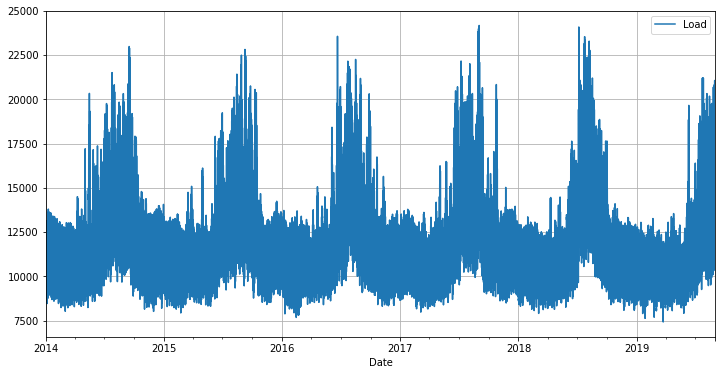

In [9]:
df.set_index('Date', inplace=True, drop=False)
df[['Load']].plot(figsize = (12,6),grid = True)

In [10]:
#sort dataset

In [11]:
df3 = df.sort_values('temp')
df3[:5]

,Date,Load,temp,year,month,day,hour,dayofweek,pred1
Date,,,,,,,,,
2015-12-28 14:00:00,2015-12-28 14:00:00,11591.0,32.1602,2015,12,28,14,0,12606.025560
2015-12-28 13:00:00,2015-12-28 13:00:00,11460.0,32.8433,2015,12,28,13,0,12306.483444
2015-01-01 13:00:00,2015-01-01 13:00:00,9391.0,32.8955,2015,1,1,13,3,12202.597440
2015-01-02 14:00:00,2015-01-02 14:00:00,10509.0,32.9927,2015,1,2,14,4,12449.952767
2015-01-01 15:00:00,2015-01-01 15:00:00,9494.0,33.1340,2015,1,1,15,3,12763.935685


In [12]:
temp = df3.temp
load = df3.Load

In [13]:
temp1 = temp.values.reshape(-1,1)
temp1[:5]

array([[32.1602],
       [32.8433],
       [32.8955],
       [32.9927],
       [33.134 ]])

In [14]:
poly = PolynomialFeatures(degree=2)
temp2 = poly.fit_transform(temp1)
temp2[:5]

array([[1.00000000e+00, 3.21602000e+01, 1.03427846e+03],
       [1.00000000e+00, 3.28433000e+01, 1.07868235e+03],
       [1.00000000e+00, 3.28955000e+01, 1.08211392e+03],
       [1.00000000e+00, 3.29927000e+01, 1.08851825e+03],
       [1.00000000e+00, 3.31340000e+01, 1.09786196e+03]])

In [15]:
model3 = LinearRegression().fit(temp2,load)
l_pred = model3.predict(temp2)

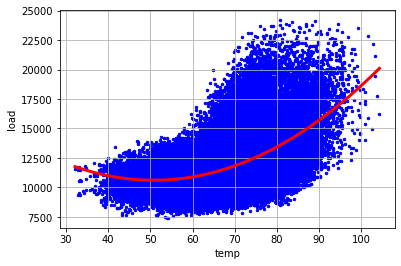

In [16]:
plt.scatter(temp,load,c='b',s=6)
plt.plot(temp,l_pred,c='r',lw=3)
plt.xlabel('temp')
plt.ylabel('load')
plt.grid()

In [17]:
df['temp_square'] = np.square(df['temp'])
df[:5]

,Date,Load,temp,year,month,day,hour,dayofweek,pred1,temp_square
Date,,,,,,,,,,
2014-01-01 00:00:00,2014-01-01 00:00:00,9891.0,59.4685,2014,1,1,0,2,9918.880255,3536.502492
2014-01-01 01:00:00,2014-01-01 01:00:00,9553.0,61.4030,2014,1,1,1,2,9436.421064,3770.328409
2014-01-01 02:00:00,2014-01-01 02:00:00,9222.0,55.0310,2014,1,1,2,2,9118.871381,3028.410961
2014-01-01 03:00:00,2014-01-01 03:00:00,9024.0,53.1878,2014,1,1,3,2,8960.476921,2828.942069
2014-01-01 04:00:00,2014-01-01 04:00:00,8987.0,51.9944,2014,1,1,4,2,9053.230022,2703.417631


In [18]:
model4 = smf.ols(formula = 'Load~ C(month) + C(day) + C(hour) + C(dayofweek) + year + \
temp + temp_square + temp*C(hour) + temp_square*C(hour) ',data = df).fit()
model4.rsquared

0.8985126605900585

In [19]:
df['pred4'] = model4.predict(df)
df[:5]

,Date,Load,temp,year,month,day,hour,dayofweek,pred1,temp_square,pred4
Date,,,,,,,,,,,
2014-01-01 00:00:00,2014-01-01 00:00:00,9891.0,59.4685,2014,1,1,0,2,9918.880255,3536.502492,10385.982918
2014-01-01 01:00:00,2014-01-01 01:00:00,9553.0,61.4030,2014,1,1,1,2,9436.421064,3770.328409,9833.076333
2014-01-01 02:00:00,2014-01-01 02:00:00,9222.0,55.0310,2014,1,1,2,2,9118.871381,3028.410961,9843.968668
2014-01-01 03:00:00,2014-01-01 03:00:00,9024.0,53.1878,2014,1,1,3,2,8960.476921,2828.942069,9812.090217
2014-01-01 04:00:00,2014-01-01 04:00:00,8987.0,51.9944,2014,1,1,4,2,9053.230022,2703.417631,10007.600336


In [20]:
y = df['Load']
y_pred = df['pred4']

In [21]:
mean_absolute_percentage_error(y,y_pred)

5.171918662666835

In [22]:
df['lag24'] = df['Load'].shift(24)
df[:5]

,Date,Load,temp,year,month,day,hour,dayofweek,pred1,temp_square,pred4,lag24
Date,,,,,,,,,,,,
2014-01-01 00:00:00,2014-01-01 00:00:00,9891.0,59.4685,2014,1,1,0,2,9918.880255,3536.502492,10385.982918,NaN
2014-01-01 01:00:00,2014-01-01 01:00:00,9553.0,61.4030,2014,1,1,1,2,9436.421064,3770.328409,9833.076333,NaN
2014-01-01 02:00:00,2014-01-01 02:00:00,9222.0,55.0310,2014,1,1,2,2,9118.871381,3028.410961,9843.968668,NaN
2014-01-01 03:00:00,2014-01-01 03:00:00,9024.0,53.1878,2014,1,1,3,2,8960.476921,2828.942069,9812.090217,NaN
2014-01-01 04:00:00,2014-01-01 04:00:00,8987.0,51.9944,2014,1,1,4,2,9053.230022,2703.417631,10007.600336,NaN


In [23]:
df5 = df.copy()
df5.dropna(inplace=True)
df5[:5]

,Date,Load,temp,year,month,day,hour,dayofweek,pred1,temp_square,pred4,lag24
Date,,,,,,,,,,,,
2014-01-02 00:00:00,2014-01-02 00:00:00,9191.0,68.0000,2014,1,2,0,3,9954.957999,4624.000000,10127.179518,9891.0
2014-01-02 01:00:00,2014-01-02 01:00:00,8860.0,61.5641,2014,1,2,1,3,9472.498808,3790.138409,9871.350200,9553.0
2014-01-02 02:00:00,2014-01-02 02:00:00,8682.0,57.2234,2014,1,2,2,3,9154.949126,3274.517508,9760.510817,9222.0
2014-01-02 03:00:00,2014-01-02 03:00:00,8676.0,54.9374,2014,1,2,3,3,8996.554666,3018.117919,9738.107360,9024.0
2014-01-02 04:00:00,2014-01-02 04:00:00,8917.0,54.9734,2014,1,2,4,3,9089.307767,3022.074708,9841.304676,8987.0


In [24]:
model5 = smf.ols(formula = 'Load~C(month) + C(day) + C(hour) + C(dayofweek) + year + \
temp + temp_square + temp*C(hour) + temp_square*C(hour) + lag24',data = df5).fit()
model5.rsquared

0.9409536275110548

In [25]:
df5['pred5'] = model5.predict(df5)
df5[:5]

,Date,Load,temp,year,month,day,hour,dayofweek,pred1,temp_square,pred4,lag24,pred5
Date,,,,,,,,,,,,,
2014-01-02 00:00:00,2014-01-02 00:00:00,9191.0,68.0000,2014,1,2,0,3,9954.957999,4624.000000,10127.179518,9891.0,9994.203737
2014-01-02 01:00:00,2014-01-02 01:00:00,8860.0,61.5641,2014,1,2,1,3,9472.498808,3790.138409,9871.350200,9553.0,9712.469264
2014-01-02 02:00:00,2014-01-02 02:00:00,8682.0,57.2234,2014,1,2,2,3,9154.949126,3274.517508,9760.510817,9222.0,9483.744623
2014-01-02 03:00:00,2014-01-02 03:00:00,8676.0,54.9374,2014,1,2,3,3,8996.554666,3018.117919,9738.107360,9024.0,9359.716397
2014-01-02 04:00:00,2014-01-02 04:00:00,8917.0,54.9734,2014,1,2,4,3,9089.307767,3022.074708,9841.304676,8987.0,9374.209155


In [26]:
y = df5['Load']
y_pred = df5['pred5']

In [27]:
mean_absolute_percentage_error(y,y_pred)

3.8437939643427144

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


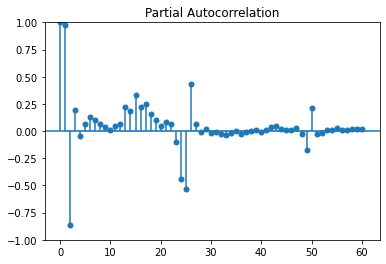

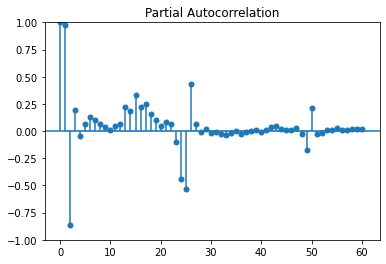

In [28]:
Load = df.Load
sm.graphics.tsa.plot_pacf(Load, lags =60)

In [29]:
df['lag1'] = df['Load'].shift(25)
df['lag2'] = df['Load'].shift(168)
df6 = df.copy()
df6.dropna(inplace=True)
df6[:5]

,Date,Load,temp,year,month,day,hour,dayofweek,pred1,temp_square,pred4,lag24,lag1,lag2
Date,,,,,,,,,,,,,,
2014-01-08 00:00:00,2014-01-08 00:00:00,9531.0,64.0373,2014,1,8,0,2,10022.796946,4100.775791,10252.287462,9351.0,9995.0,9891.0
2014-01-08 01:00:00,2014-01-08 01:00:00,9261.0,61.1816,2014,1,8,1,2,9540.337755,3743.188179,9954.261203,9008.0,9351.0,9553.0
2014-01-08 02:00:00,2014-01-08 02:00:00,9143.0,58.5185,2014,1,8,2,2,9222.788072,3424.414842,9768.332744,8815.0,9008.0,9222.0
2014-01-08 03:00:00,2014-01-08 03:00:00,9097.0,57.7022,2014,1,8,3,2,9064.393612,3329.543885,9663.960172,8755.0,8815.0,9024.0
2014-01-08 04:00:00,2014-01-08 04:00:00,9184.0,57.3026,2014,1,8,4,2,9157.146713,3283.587967,9790.390365,8990.0,8755.0,8987.0


In [30]:
model6 = smf.ols(formula = 'Load~C(month) + C(day) + C(hour) + C(dayofweek) + year + \
temp + temp_square + temp*C(hour) + temp_square*C(hour) + lag2 + lag1 + lag24',data = df6).fit()
model6.rsquared

0.9455335397916065

In [31]:
df6['pred6'] = model6.predict(df6)
df6[:5]

,Date,Load,temp,year,month,day,hour,dayofweek,pred1,temp_square,pred4,lag24,lag1,lag2,pred6
Date,,,,,,,,,,,,,,,
2014-01-08 00:00:00,2014-01-08 00:00:00,9531.0,64.0373,2014,1,8,0,2,10022.796946,4100.775791,10252.287462,9351.0,9995.0,9891.0,9726.426980
2014-01-08 01:00:00,2014-01-08 01:00:00,9261.0,61.1816,2014,1,8,1,2,9540.337755,3743.188179,9954.261203,9008.0,9351.0,9553.0,9462.963451
2014-01-08 02:00:00,2014-01-08 02:00:00,9143.0,58.5185,2014,1,8,2,2,9222.788072,3424.414842,9768.332744,8815.0,9008.0,9222.0,9264.063618
2014-01-08 03:00:00,2014-01-08 03:00:00,9097.0,57.7022,2014,1,8,3,2,9064.393612,3329.543885,9663.960172,8755.0,8815.0,9024.0,9166.591022
2014-01-08 04:00:00,2014-01-08 04:00:00,9184.0,57.3026,2014,1,8,4,2,9157.146713,3283.587967,9790.390365,8990.0,8755.0,8987.0,9353.192264


In [32]:
y = df6['Load']
y_pred = df6['pred6']

In [33]:
mean_absolute_percentage_error(y,y_pred)

3.6336205198355107

In [34]:
df_test = df6[df6.year == 2019]
df_test[:5]

,Date,Load,temp,year,month,day,hour,dayofweek,pred1,temp_square,pred4,lag24,lag1,lag2,pred6
Date,,,,,,,,,,,,,,,
2019-01-01 00:00:00,2019-01-01 00:00:00,9761.0,57.92850,2019,1,1,0,1,9367.734356,3355.711112,10022.582677,9352.0,9883.0,8922.0,9692.814791
2019-01-01 01:00:00,2019-01-01 01:00:00,9438.0,57.03736,2019,1,1,1,1,8885.275165,3253.260436,9590.048014,8967.0,9352.0,8594.0,9265.016069
2019-01-01 02:00:00,2019-01-01 02:00:00,9177.0,55.31236,2019,1,1,2,1,8567.725482,3059.457169,9335.954241,8755.0,8967.0,8349.0,9023.132567
2019-01-01 03:00:00,2019-01-01 03:00:00,9024.0,52.90550,2019,1,1,3,1,8409.331022,2798.991930,9343.557499,8707.0,8755.0,8102.0,8978.746811
2019-01-01 04:00:00,2019-01-01 04:00:00,9015.0,50.70200,2019,1,1,4,1,8502.084123,2570.692804,9629.910896,8881.0,8707.0,8074.0,9168.730210


In [35]:
df_train = df6[df6.year != 2019]
df_train[:5]

,Date,Load,temp,year,month,day,hour,dayofweek,pred1,temp_square,pred4,lag24,lag1,lag2,pred6
Date,,,,,,,,,,,,,,,
2014-01-08 00:00:00,2014-01-08 00:00:00,9531.0,64.0373,2014,1,8,0,2,10022.796946,4100.775791,10252.287462,9351.0,9995.0,9891.0,9726.426980
2014-01-08 01:00:00,2014-01-08 01:00:00,9261.0,61.1816,2014,1,8,1,2,9540.337755,3743.188179,9954.261203,9008.0,9351.0,9553.0,9462.963451
2014-01-08 02:00:00,2014-01-08 02:00:00,9143.0,58.5185,2014,1,8,2,2,9222.788072,3424.414842,9768.332744,8815.0,9008.0,9222.0,9264.063618
2014-01-08 03:00:00,2014-01-08 03:00:00,9097.0,57.7022,2014,1,8,3,2,9064.393612,3329.543885,9663.960172,8755.0,8815.0,9024.0,9166.591022
2014-01-08 04:00:00,2014-01-08 04:00:00,9184.0,57.3026,2014,1,8,4,2,9157.146713,3283.587967,9790.390365,8990.0,8755.0,8987.0,9353.192264


In [36]:
model7 = smf.ols(formula = 'Load~C(month) + C(day) + C(hour) + C(dayofweek) + year + \
temp + temp_square + temp*C(hour) + temp_square*C(hour) + lag1 + lag2 + lag24 ',data = df_train).fit()

In [37]:
df_test['yhat'] = model7.predict(df_test)

/var/folders/j0/n0cfyqjj4x7dq8k6d01p7jwm0000gn/T/ipykernel_99189/2609942101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['yhat'] = model7.predict(df_test)


In [38]:
yhat = df_test['yhat']
y_test = df_test['Load']
test_sse = sum((y_test - yhat)**2)
test_sstot = sum((y_test - np.mean(y_test))**2)
test_r_square = 1 - test_sse/test_sstot
test_r_square

0.9421370030071702

In [39]:
y = df_test['Load']
y_pred = df_test['yhat']

In [40]:
mean_absolute_percentage_error(y,y_pred)

3.8907135701280406

In [41]:
df8 = df.pivot_table(values= 'Load' ,index = 'month',columns = 'year',aggfunc=np.sum)
df8

year,2014,2015,2016,2017,2018,2019
month,,,,,,
1,8.125121e+06,7.948139e+06,7.890403e+06,8241383.80,7.893475e+06,7674611.0
2,7.115328e+06,7.069667e+06,7.203334e+06,7169334.00,7.078015e+06,7044857.0
3,7.880222e+06,8.251539e+06,7.970582e+06,7772633.70,7.599821e+06,7426485.1
4,7.834732e+06,7.826198e+06,7.918706e+06,7649655.82,7.468079e+06,7463246.8
5,8.938985e+06,8.034828e+06,8.235517e+06,8369397.86,8.038964e+06,7594325.0
6,9.067417e+06,9.219019e+06,9.732516e+06,9432457.70,8.735698e+06,8294990.0
7,1.076457e+07,9.941227e+06,1.089069e+07,11050385.50,1.168318e+07,10077470.4
8,1.048651e+07,1.077403e+07,1.086740e+07,11100572.50,1.147829e+07,10520454.9
9,1.022190e+07,1.034573e+07,9.378533e+06,9607095.63,9.343093e+06,335328.0


<AxesSubplot:xlabel='month'>

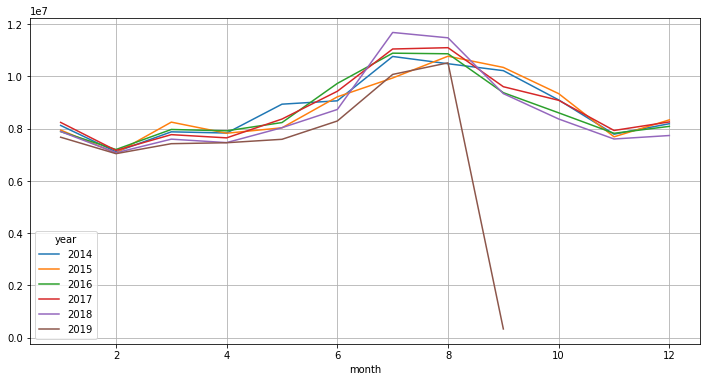

In [42]:
df8.plot(figsize = (12,6),grid = True)